# Assignment 8

by:<br />Erik Rosvall (960523)

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv('Poll_Info.csv', sep='\t')
df2 = pd.read_csv('Poll_Report.csv', sep=';')

## Data processing for question 1 and 2

The two first questions are displaed with matplotlib

In [3]:
"""
Getting the 'Correct Answer' from Poll_Info.csv
"""
dd = df1['Correct Answer']
num = []

for i in range(len(dd)):
    num.append(dd[i])
#print(num)

In [4]:
"""
Getting question
"""
ddd = df1['Question']
quest = []

for i in range(len(ddd)):
    quest.append(ddd[i])
#print(quest)

In [5]:
"""
Creating a dictionary for the correct answers
"""
info_dict = {}
info_dict = dict(zip(quest, num))
#print(info_dict)

In [6]:
"""
Getting the question ID
"""
ss = df2['Question ID']
qid = []
for i in range(len(ss)):
    qid.append(ss[i])
#print(qid)
#print(len(qid))

In [7]:
"""
Student answers
"""
sss = df2['Student Answer']
sa = []
for i in range(len(sss)):
    sa.append(sss[i])
#print(sa)
#print(len(sa))

## Question 1
### Analyse how many questions are correctly answered by each student.

In [8]:
"""
Get student names
"""
student_names = df2['User Name']
sqid = df2['Question ID']
san = tuple(zip(sqid, student_names, sa))
#print(len(student_names))
#print(san)
#print(len(san))

In [9]:
snam = []
for i in range(len(student_names)):
    if student_names[i] not in snam:
        snam.append(student_names[i])
#print(snam)

In [10]:
score = []
c = 0

for i in range(len(snam)):
    for key, val in info_dict.items():
        for j in range(len(san)):
            ii, n, a = san[j]
            if snam[i] == n:
                if ii == key and a == val:
                    c += 1
    score.append(c)
    c = 0
#print(score)

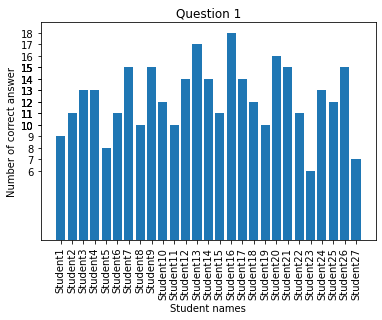

In [11]:
plt.bar(snam, score)
plt.xticks(snam)
plt.xticks(rotation=90)
plt.yticks(score)
plt.title('Question 1')
plt.xlabel('Student names')
plt.ylabel('Number of correct answer')
plt.show()

If we look at the graph above, we can see that on the y-axis are the "Number of correct answer" and on the x-axis are "Student names". Important to note here are that only correct anwer are shown. Each pilar in the graph represents how manyy **correct** answer each student had in total of the test.

According to the graph, student 16 have the highet score on the test, and student 23 has the lowest score. The rest of the students scores varies in the range between student 16 and student 23. 

## Question 2
### Analyse how many students answered correctly for each question

In [12]:
# zipping the question id with student answer 
# for q2
s = tuple(zip(qid, sa))


In [13]:
c = 0
cc = []
for key, val in info_dict.items():
    for i in range(len(s)):
        k, v = s[i]
        #print(k,v)
        if key == k and val == v:
            #print(k,v)
            #print(key, val)
            c +=1
    cc.append(c)
    c = 0

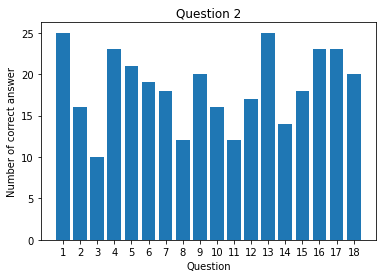

In [14]:
plt.bar(quest, cc)
plt.xticks(quest)
plt.title('Question 2')
plt.xlabel('Question')
plt.ylabel('Number of correct answer')
plt.show()

In this graph do we have "Number of correct answer" on the y-axis and "Question" on the x-axis. This graph shows how many answer correctly for each question in total.

If we look at the graph we can see that question 1 and question 13 have the highest score of all questions. Question 3 have the lowers correct score. The remainder of the questions are in the range between these questions.

## Question 3

This are displayed with seaborn

This block below takes the two CSV-files and concatenats them.<br />This makes it easier to display the rest of the questions

In [15]:
"""
This block can be used to get all the data for every question.
"""

# sticth (merge) the two csv-files together
# df1 and df2 are from the import form the beginning
df_stitch = pd.merge(df1, df2, left_on='Question', right_on='Question ID')
df_stitch.drop('Question ID', axis=1, inplace = True)

# Getting the data 
df_stitch['date_time_launched']=pd.to_datetime(df_stitch['Time Launched']).dt.time
df_stitch['date_submitted_time']=pd.to_datetime(df_stitch['Submitted Date/Time']).dt.time
df_stitch.drop(['Time Launched','Submitted Date/Time'],axis=1,inplace=True)

# Getting timedata
df_stitch['seconds_for_answering']= (pd.to_timedelta(df_stitch['date_submitted_time'].astype(str)) - 
                             pd.to_timedelta(df_stitch['date_time_launched'].astype(str))).dt.total_seconds()

# dropping data
df_stitch.drop(['date_time_launched','date_submitted_time'],axis=1,inplace=True)

# Checiking the answers and see if they are true
df_stitch['answer_is_true'] = np.where(df_stitch['Correct Answer']==df_stitch['Student Answer'],1,0)
df_stitch['answer_is_true'] = df_stitch['answer_is_true'].astype('object')

# rename column
df_stitch.rename(columns={'User Name':'s_numb'}, inplace=True)
merge_df = df_stitch.groupby(['s_numb','User Email']).agg({'answer_is_true':'sum'}).sort_values(by='answer_is_true', ascending=True)


**NOTE** The time have been converted from minutes to seconds, scince I find it easier to read data in seconds rather than in minutes. By showing the result in seconds gives teh reader a more detailed description of the result. Hence it's important to write out that the result is in seconds, otherwise the reader might understand the values as minutes, and if it would happend the reader will get the wrong picture of the analyzis.

### a) For each student, which question(s) took the longest time for that student

In [16]:
dfpivtime =df_stitch.pivot(index='s_numb', columns='Question', values=['seconds_for_answering'])
dfpivtime

seconds_for_answering                                               \
Question                     1     2      3     4     5     6      7      8    
s_numb                                                                         
Student1                   32.0  88.0  117.0  26.0  92.0  29.0   34.0   60.0   
Student10                  28.0  35.0   23.0  29.0  46.0  36.0   85.0   68.0   
Student11                  31.0  64.0  117.0  69.0  97.0  33.0   54.0  123.0   
Student12                  46.0  74.0   75.0  39.0  39.0  32.0   39.0   45.0   
Student13                  29.0  50.0    8.0  39.0  33.0  32.0  100.0   88.0   
Student14                  26.0  21.0   50.0  58.0  27.0  29.0   39.0   39.0   
Student15                  37.0  91.0   64.0  58.0  89.0  66.0   92.0  102.0   
Student16                  33.0  31.0   17.0  21.0  30.0  31.0   55.0   59.0   
Student17                  25.0  51.0   61.0  88.0  42.0  41.0   67.0  118.0   
Student18                  30.0  36.0   24.0  28.0  49.0  42.0   77.0   74.0   
Student19                  28.0  51.0   83.0  54.0  70.0  29.0   58.0  110.0   
Student2                   26.0  64.0  116.0  67.0  90.0  33.0   55.0  130.0   
Student20                  27.0  54.0   84.0  57.0  48.0  29.0   78.0   61.0   
Student21                  28.0  44.0   50.0  58.0  57.0  48.0   67.0   83.0   
Student22                  26.0  80.0   96.0  84.0  39.0  36.0   54.0  117.0   
Student23                  26.0  20.0  115.0  96.0  31.0  36.0   34.0  129.0   
Student24                  27.0  43.0   33.0  56.0  28.0  62.0   70.0  105.0   
Student25                  26.0  42.0   47.0  59.0  58.0  65.0   90.0  102.0   
Student26                  26.0  56.0   59.0  43.0  33.0  32.0   48.0   72.0   
Student27                  38.0  57.0   29.0  57.0  79.0  60.0   90.0  100.0   
Student3                   31.0  61.0   37.0  96.0  35.0  32.0   44.0  100.0   
Student4                   29.0  27.0   24.0  59.0  62.0  36.0   94.0   57.0   
Student5                   30.0  53.0   55.0  61.0  28.0  32.0   49.0   56.0   
Student6                   33.0  36.0   80.0  49.0  71.0  34.0   77.0  105.0   
Student7                   26.0  38.0   16.0  34.0  30.0  29.0   58.0   57.0   
Student8                   24.0  32.0   35.0  57.0  39.0  30.0   42.0   53.0   
Student9                   29.0  33.0   55.0  32.0  27.0  30.0   49.0   51.0   

                                                                          \
Question      9      10     11     12     13     14     15     16     17   
s_numb                                                                     
Student1   109.0  110.0  153.0   75.0  120.0   64.0  117.0   89.0   67.0   
Student10  119.0   99.0  136.0  107.0   60.0   68.0   77.0   26.0   79.0   
Student11   90.0  171.0  153.0  138.0   31.0   61.0  161.0   68.0   45.0   
Student12   53.0   43.0   57.0   86.0  124.0   53.0  151.0   90.0  146.0   
Student13   83.0   80.0   45.0  102.0   73.0   89.0  215.0   99.0   31.0   
Student14   63.0   28.0   53.0   34.0   41.0   31.0   53.0   23.0   57.0   
Student15  113.0   74.0  104.0  111.0   93.0   79.0   89.0  126.0   46.0   
Student16   35.0   38.0   28.0   40.0   72.0   42.0   45.0   33.0   36.0   
Student17  149.0  160.0  116.0   42.0   74.0  102.0  111.0  125.0   36.0   
Student18   78.0  128.0   67.0  136.0   83.0   92.0   98.0   31.0   80.0   
Student19  127.0  164.0   48.0  136.0  107.0   74.0   92.0  127.0   62.0   
Student2   103.0  167.0  139.0  156.0   28.0   33.0  159.0   33.0   42.0   
Student20   44.0   49.0   67.0   82.0  110.0   55.0   42.0   58.0   53.0   
Student21   83.0   88.0   55.0  131.0   55.0   78.0   86.0   69.0   33.0   
Student22  127.0  135.0  129.0   84.0   94.0  101.0  101.0  106.0   85.0   
Student23  152.0  111.0  106.0    NaN   70.0   35.0  155.0   88.0  108.0   
Student24   71.0  170.0  145.0   35.0   58.0   48.0   85.0  130.0   65.0   
Student25  114.0  114.0  144.0  129.0  116.0   66.0   61.0  110.0  108.0   
Student26   7

Here are the times for every student and their answer time for each question

In [17]:
max_s = pd.DataFrame(df_stitch.groupby(['s_numb'])['seconds_for_answering'].agg('max'))
stud_max = pd.DataFrame(max_s.merge(df_stitch, on=['s_numb','seconds_for_answering'], how='left'))
maxT = pd.DataFrame(max_s.merge(df_stitch, on=['s_numb','seconds_for_answering'], how='left'))
pd.pivot_table(maxT, values='seconds_for_answering', index=['s_numb'],
                    columns=['Question'], aggfunc=np.sum, fill_value='')

Question,9,10,11,12,13,15,16,18
s_numb,,,,,,,,
Student1,,,,,,,,281
Student10,,,136,,,,,
Student11,,,,,,,,336
Student12,,,,,,151,,
Student13,,,,,,215,,
Student14,63,,,,,,,
Student15,,,,,,,,379
Student16,,,,,72,,,
Student17,,,,,,,,232


In the table above we have gone from showing all the answer times to sorting out the longest question-answer time for each student respectivly. This makes it easier for the reader to quickly grasp the information.

### b) Which question(s) took the longest time to answer among all student

In [41]:
pd.DataFrame(df_stitch.groupby(['Question'])['seconds_for_answering'].agg('max')).tail(5)

,seconds_for_answering
Question,
14,102.0
15,280.0
16,133.0
17,146.0
18,410.0


As we can see from the result from above, we have the maximum time for each question. From this list can we see that the question that took the longest time are question 18 with a maximum time of 410 seconds.

### c) Which question(s) had the longest average response time

In [19]:
df_piv_avg_time = pd.DataFrame(df_stitch.groupby(['Question'])['seconds_for_answering'].agg('mean'))
df_piv_avg_time

,seconds_for_answering
Question,
1,29.518519
2,49.333333
3,58.148148
4,54.592593
5,50.703704
6,37.925926
7,62.925926
8,83.851852
9,93.629630


First we get the mean of the answer time for each question

In [47]:
df_piv_avg_time.tail(5)

,seconds_for_answering
Question,
14,63.629630
15,106.148148
16,78.259259
17,67.703704
18,164.730769


In [46]:
print(df_piv_avg_time.max())

seconds_for_answering    164.730769
dtype: float64


As we can see from the result from above, we have the average time for each question. From this list can we see that the question that had the highest average time are question 18 with a average time of 164.730 seconds.

## Question 4
### Investigate whether students who took a longer time to answer perform well or not

Data processing 

In [21]:
# Group students with answer time and get the mean 
s_avg_time = pd.DataFrame(df_stitch.groupby(['s_numb'])['seconds_for_answering'].agg('mean'))
# sorting all the mean values
s_avg_time = s_avg_time.sort_values(by=['seconds_for_answering'])

df_stitch['Point'] =  np.where(df_stitch['Student Answer'] == df_stitch['Correct Answer'], 1, 0)

qps = questionPerStudent = pd.DataFrame(df_stitch.groupby(['s_numb'])['Point'].agg('sum'))
qps = df_stitch.groupby(['s_numb'])['Point'].sum().reset_index()
qps = qps.sort_values(by=['Point'])

tvp = pd.DataFrame(qps.merge(s_avg_time, on='s_numb', how='left'))

Create a scatterplot (as an ide from the feedback) with a Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

# preparing the data for a scatter plot with a linear regression 
# to display how well the students preforme
x = tvp.iloc[:,2].values.reshape(-1,1)
y = tvp.iloc[:,1].values.reshape(-1,1)

model = LinearRegression().fit(x, y)
pred = model.predict(x)

model_score = str(round(model.score(x, y), 3))

Plotting the scatter plot with the linear regression

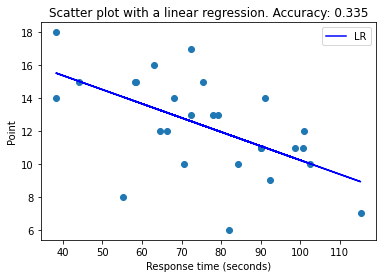

In [23]:
plt.scatter(x, y)
plt.plot(x ,pred, color='blue', label='LR')
plt.xlabel("Response time (seconds)")
plt.ylabel("Point")
plt.legend()
all_sample_title = 'Scatter plot with a linear regression. Accuracy: {0}'.format(model_score)
plt.title(all_sample_title, size = 12);
plt.show()

**Investigation**

Just by looking at the graph and the Regression line, we can see a trend that the longer students took to answer a question, the lower score did they get. r-square (with an accuracy of 0.335) are used, this is showing us a negative development the longer time a student took.

If we look at the graph we can see that around approximately 45 seconds mark there are a group that did preformed good at the test.

We can also define a group in teh interval between 60 - 80 seconds, these group have an approximately answer range between 12 - 17 points.

There seems also to be one more group in the time range of 90 - 105 (approximately) seconds. There range of points are between 9 - 13 points. 

At the bottom of the graph we have 3 points with a time span of approximately 55 to +110 seconds and tha point range is between 6-8 points. When looking at this point we can see a strong deviation from the other points. These points are regarded as outliers.

## Question 5
### Find all pairs of students who gave the same wrong answers for at least two questions

In [24]:
# Getting all wrong answer from the students
dsw = df_stitch[df_stitch["answer_is_true"]==0]

In [40]:
# plotting all answers
dfpiv=dsw.pivot(index='s_numb', columns='Question', values=['Student Answer'])
dfpiv=dfpiv.fillna('-')
dfpiv

Student Answer                                                   
Question              1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18
s_numb                                                                     
Student1               -  D  A  -  -  -  -  C  -  A  B  C  -  A  -  A  -  B
Student10              -  A  -  -  A  -  -  C  -  B  -  -  -  A  C  -  -  -
Student11              -  -  C  -  A  -  -  C  D  A  B  -  -  A  C  -  -  -
Student12              -  C  D  -  -  -  -  C  -  -  -  -  -  -  -  -  C  -
Student13              -  -  -  -  -  -  -  -  -  -  -  -  -  -  D  -  -  -
Student14              -  -  D  -  -  -  B  C  -  -  -  -  -  A  -  -  -  -
Student15              -  D  D  -  -  B  A  -  -  -  B  -  -  A  -  -  -  C
Student17              -  -  -  -  -  -  -  B  -  A  -  A  -  -  -  B  -  -
Student18              -  -  -  -  A  -  -  C  -  B  B  -  -  A  C  -  -  -
Student19              -  A  -  -  -  -  -  B  D  A  C  C  -  -  -  A  D  -
Student2               -  -  C  -  -  -  -  B  D  A  E  -  -  A  C  -  -  -
Student20              -  -  -  -  A  D  -  -  -  -  -  -  -  -  -  -  -  -
Student21              -  -  -  -  -  D  B  C  -  -  -  -  -  -  -  -  -  -
Student22              -  A  D  B  -  -  -  A  D  -  B  -  -  A  -  -  -  -
Student23              -  -  D  B  -  D  -  E  -  A  B  -  A  A  C  -  E  -
Student24              -  -  -  -  -  D  B  C  -  C  E  -  -  -  -  -  -  -
Student25              -  D  D  -  -  -  A  -  -  -  B  -  -  A  -  -  -  C
Student26              -  -  -  -  -  -  -  -  -  -  B  A  -  A  -  -  -  -
Student27              B  D  D  -  A  C  D  -  -  B  B  A  -  -  D  -  -  B
Student3               -  -  D  B  -  -  -  C  C  -  -  -  -  A  -  -  -  -
Student4               -  A  D  B  -  -  B  -  D  -  -  -  -  -  -  -  -  -
Student5               -  D  C  -  A  -  D  C  -  -  E  C  A  -  C  -  -  B
Student6               B  -  A  -  -  D  B  -  -  -  -  -  -  -  C  A  A  -
Student7               -  -  D  -  -  D  -  -  -  -  -  E  -  -  -  -  -  -
Student8               -  C  C  -  -  -  -  -  C  A  B  A  -  A  -  -  -  B
Student9               -  -  D  -  -  -  -  -  -  -  B  E  -  -  -  -  -  -

In the table all cells that contains a '-' is a coorect answer, and if it's a letter (wrong answer from student) it's the wrong answer.

In [26]:
pairs = []
for s, r in dfpiv.iterrows(): # loop for first student
    cs = []
    for q in r['Student Answer']:
        cs.append(q)
    for ss, rr in dfpiv.iterrows(): # loop for next student
        cq = []
        p = []
        co = 0
        if s != ss:
            for qq in rr['Student Answer']: # loop over sudentanswer for rr
                cq.append(qq)
            for alpha, beta in zip(cs, cq):
                if s != ss and alpha != 0 and beta != 0:
                    if alpha == beta:
                        co += 1
            if co >= 2:
                p.append(s)
                p.append(ss)
        if len(p) == 2 and [ss, s] not in pairs:
            pairs.append(p)
print('Number of pairs',len(pairs))
#print(pairs)

Number of pairs 113


> Scince the question said "at least" 2 in the same pairs. I made an assumtions that if it is two that have answer  wrong on the same question, they are a pair in the list.

In this block above we are looking for pairs where students answered wrong at the same question, this block does also filter duplicates.

Without duplicates there are 113 pairs where a pair of students answered wrong on the same question.

In [48]:
for i in range(len(pairs)):
    print(pairs[i])

['Student1', 'Student10']
['Student1', 'Student11']
['Student1', 'Student14']
['Student1', 'Student15']
['Student1', 'Student18']
['Student1', 'Student19']
['Student1', 'Student2']
['Student1', 'Student22']
['Student1', 'Student23']
['Student1', 'Student25']
['Student1', 'Student26']
['Student1', 'Student27']
['Student1', 'Student3']
['Student1', 'Student5']
['Student1', 'Student6']
['Student1', 'Student8']
['Student10', 'Student11']
['Student10', 'Student14']
['Student10', 'Student18']
['Student10', 'Student2']
['Student10', 'Student22']
['Student10', 'Student23']
['Student10', 'Student27']
['Student10', 'Student3']
['Student10', 'Student5']
['Student11', 'Student14']
['Student11', 'Student15']
['Student11', 'Student18']
['Student11', 'Student19']
['Student11', 'Student2']
['Student11', 'Student22']
['Student11', 'Student23']
['Student11', 'Student25']
['Student11', 'Student26']
['Student11', 'Student27']
['Student11', 'Student3']
['Student11', 'Student5']
['Student11', 'Student8']
['

In the block above are all pairs where students answered wrong at the same question 